###### DISCLAIMER: This homework was done on Google collab with permission from the instructor, to utilize the T4 GPU from Google, along with CUDA. However, let it be known that Google collab has an auto fill feature (similar to that of Gmail autofill or on Google docs where it finishes sentences for you), which could autofill the code. I wasn't able to find the setting to turn it off, however, I tried my best to adhere to the academic honesty policies. Wherever autofill was used, I have cited it, but also primarily because it made sense to do the code that way. However, all points of academic honesty was honored.

In [2]:
# For tips on running notebooks in Google Colab, see
# https://pytorch.org/tutorials/beginner/colab
%matplotlib inline

In [3]:
import torch
import torchvision
import torchvision.transforms as transforms

In [4]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 16  #changed from 4 -> 16

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

100%|██████████| 170M/170M [00:01<00:00, 105MB/s]


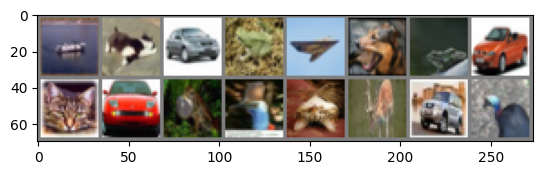

ship  cat   car   frog  plane dog   frog  car   cat   car   frog  bird  cat   deer  car   bird 


In [5]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

In [25]:
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

net = Net()

In [7]:
import torch.optim as optim
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

[1,  2000] loss: 2.166
Validation accuracy after epoch 1: 37.27%
[2,  2000] loss: 1.609
Validation accuracy after epoch 2: 46.86%
[3,  2000] loss: 1.412
Validation accuracy after epoch 3: 52.74%
[4,  2000] loss: 1.281
Validation accuracy after epoch 4: 56.14%
[5,  2000] loss: 1.196
Validation accuracy after epoch 5: 58.47%
[6,  2000] loss: 1.123
Validation accuracy after epoch 6: 60.23%
[7,  2000] loss: 1.065
Validation accuracy after epoch 7: 59.52%
[8,  2000] loss: 1.006
Validation accuracy after epoch 8: 60.64%
[9,  2000] loss: 0.962
Validation accuracy after epoch 9: 61.58%
[10,  2000] loss: 0.922
Validation accuracy after epoch 10: 63.87%
Finished Training


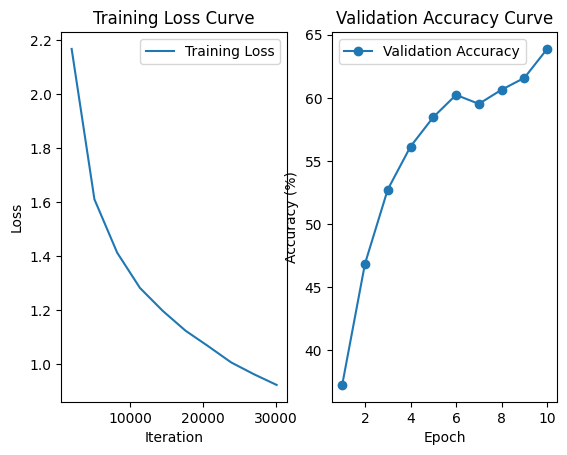

In [8]:
# Lists to store loss and accuracy values.
train_losses = []  #NEW VARS
iter_counts = []  #NEW VARS
val_accs = []     #NEW VARS
iteration_count = 0 #NEW VARIABLE

for epoch in range(10):  # changed from 2 -> 10 epochs

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        iteration_count += 1
        if i % 2000 == 1999:    # Chnaged 2000,1999 -> 200, 199 print every 200 mini-batches
            # Record and reset running loss for plotting
            train_losses.append(running_loss / 2000)             #APPEND TO LIST
            iter_counts.append(iteration_count)
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0
    # Evaluate on validation data after each epoch.
    correct = 0
    total = 0
    with torch.no_grad():
        for data in testloader:
            images, labels = data
            outputs = net(images)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    acc = 100 * correct / total
    val_accs.append(acc)
    print(f'Validation accuracy after epoch {epoch+1}: {acc:.2f}%')
print('Finished Training')
plt.figure()
plt.subplot(1,2,1)
plt.plot(iter_counts, train_losses, label='Training Loss')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Training Loss Curve')
plt.legend()
plt.subplot(1,2,2)
plt.plot(range(1, len(val_accs)+1), val_accs, marker='o', label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.title('Validation Accuracy Curve')
plt.legend()

In [9]:
#Let\'s quickly save our trained model:
PATH = './cifar_net.pth'
torch.save(net.state_dict(), PATH)

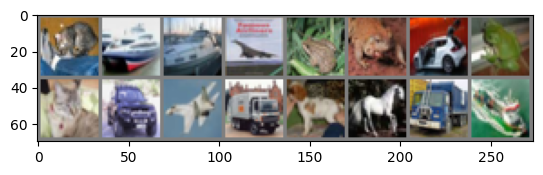

GroundTruth:  cat   ship  ship  plane frog  frog  car   frog  cat   car   plane truck dog   horse truck ship 


In [10]:
dataiter = iter(testloader)
images, labels = next(dataiter)

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join(f'{classes[labels[j]]:5s}' for j in range(16)))

Next, let\'s load back in our saved model (note: saving and re-loading
the model wasn\'t necessary here, we only did it to illustrate how to do
so):


In [11]:
net = Net()
net.load_state_dict(torch.load(PATH, weights_only=True))

<All keys matched successfully>

Okay, now let us see what the neural network thinks these examples above
are:


In [12]:
outputs = net(images)

In [13]:
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join(f'{classes[predicted[j]]:5s}'
                              for j in range(16)))

Predicted:  cat   car   plane plane frog  frog  bird  frog  cat   car   plane truck frog  horse truck ship 


In [14]:
correct = 0
total = 0
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for data in testloader:
        images, labels = data
        # calculate outputs by running images through the network
        outputs = net(images)
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')

Accuracy of the network on the 10000 test images: 63 %


In [15]:
# prepare to count predictions for each class
correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}

# again no gradients needed
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predictions = torch.max(outputs, 1)
        # collect the correct predictions for each class
        for label, prediction in zip(labels, predictions):
            if label == prediction:
                correct_pred[classes[label]] += 1
            total_pred[classes[label]] += 1


# print accuracy for each class
for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    print(f'Accuracy for class: {classname:5s} is {accuracy:.1f} %')

Accuracy for class: plane is 74.5 %
Accuracy for class: car   is 78.5 %
Accuracy for class: bird  is 51.9 %
Accuracy for class: cat   is 41.6 %
Accuracy for class: deer  is 59.0 %
Accuracy for class: dog   is 46.7 %
Accuracy for class: frog  is 74.7 %
Accuracy for class: horse is 73.4 %
Accuracy for class: ship  is 67.3 %
Accuracy for class: truck is 71.1 %


Training on GPU
===============

Let\'s first define our device as the first visible cuda device if we
have CUDA available:

PART B

In [22]:
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [23]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

# Assuming that we are on a CUDA machine, this should print a CUDA device:

print(device)

cuda:0


In [24]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 16  #changed from 4 -> 16

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

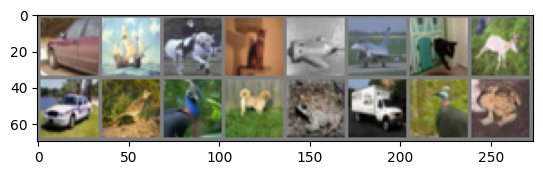

car   ship  horse cat   plane plane cat   deer  car   bird  bird  dog   frog  truck bird  frog 


In [25]:

def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

In [26]:

class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()

In [27]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

[1,  2000] loss: 2.135
Validation accuracy after epoch 1: 39.21%
[2,  2000] loss: 1.578
Validation accuracy after epoch 2: 48.57%
[3,  2000] loss: 1.396
Validation accuracy after epoch 3: 52.32%
[4,  2000] loss: 1.297
Validation accuracy after epoch 4: 55.03%
[5,  2000] loss: 1.212
Validation accuracy after epoch 5: 56.30%
[6,  2000] loss: 1.147
Validation accuracy after epoch 6: 59.30%
[7,  2000] loss: 1.097
Validation accuracy after epoch 7: 60.12%
[8,  2000] loss: 1.048
Validation accuracy after epoch 8: 60.56%
[9,  2000] loss: 1.003
Validation accuracy after epoch 9: 61.76%
[10,  2000] loss: 0.968
Validation accuracy after epoch 10: 61.19%
Finished Training


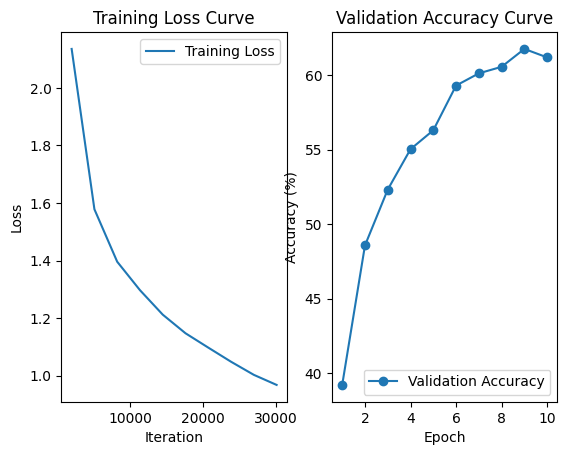

In [28]:
# Lists to store loss and accuracy values.
train_losses = []  #NEW VARS
iter_counts = []  #NEW VARS
val_accs = []     #NEW VARS
iteration_count = 0 #NEW VARIABLE

for epoch in range(10):  # changed from 2 -> 10 epochs

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        # print statistics
        running_loss += loss.item()
        iteration_count += 1

        if i % 2000 == 1999:    # Chnaged 2000,1999 -> 200, 199 print every 200 mini-batches

            # Record and reset running loss for plotting
            train_losses.append(running_loss / 2000)             #APPEND TO LIST
            iter_counts.append(iteration_count)

            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0
    # Evaluate on validation data after each epoch.
    correct = 0
    total = 0
    with torch.no_grad():
        for data in testloader:
            images, labels = data
            outputs = net(images)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    acc = 100 * correct / total
    val_accs.append(acc)
    print(f'Validation accuracy after epoch {epoch+1}: {acc:.2f}%')
print('Finished Training')
plt.figure()
plt.subplot(1,2,1)
plt.plot(iter_counts, train_losses, label='Training Loss')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Training Loss Curve')
plt.legend()
plt.subplot(1,2,2)
plt.plot(range(1, len(val_accs)+1), val_accs, marker='o', label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.title('Validation Accuracy Curve')
plt.legend()

In [29]:
#Let\'s quickly save our trained model:
PATH = './cifar_net.pth'
torch.save(net.state_dict(), PATH)

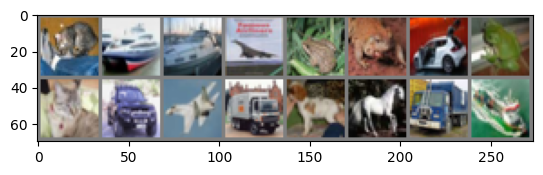

GroundTruth:  cat   ship  ship  plane frog  frog  car   frog  cat   car   plane truck dog   horse truck ship 


In [30]:
dataiter = iter(testloader)
images, labels = next(dataiter)
# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join(f'{classes[labels[j]]:5s}' for j in range(16)))

In [31]:
net = Net().cuda()
net.load_state_dict(torch.load(PATH, weights_only=True))

<All keys matched successfully>

In [35]:
outputs = net(images.cuda())

In [37]:
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join(f'{classes[predicted[j]]:5s}'
                              for j in range(16)))

Predicted:  cat   ship  ship  plane deer  frog  car   frog  cat   car   plane truck frog  horse truck frog 


In [41]:
correct = 0
total = 0
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for data in testloader:
        images, labels = data
        images = images.cuda()
        labels = labels.cuda()
        # calculate outputs by running images through the network
        outputs = net(images)
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')

Accuracy of the network on the 10000 test images: 61 %


In [43]:
# prepare to count predictions for each class
correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}
# again no gradients needed
with torch.no_grad():
    for data in testloader:
        images, labels = data
        images = images.cuda()
        labels = labels.cuda()
        outputs = net(images)
        _, predictions = torch.max(outputs, 1)
        # collect the correct predictions for each class
        for label, prediction in zip(labels, predictions):
            if label == prediction:
                correct_pred[classes[label]] += 1
            total_pred[classes[label]] += 1
# print accuracy for each class
for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    print(f'Accuracy for class: {classname:5s} is {accuracy:.1f} %')

Accuracy for class: plane is 66.4 %
Accuracy for class: car   is 77.6 %
Accuracy for class: bird  is 54.3 %
Accuracy for class: cat   is 29.8 %
Accuracy for class: deer  is 42.8 %
Accuracy for class: dog   is 55.7 %
Accuracy for class: frog  is 78.8 %
Accuracy for class: horse is 62.6 %
Accuracy for class: ship  is 69.5 %
Accuracy for class: truck is 74.4 %


In [45]:
#PART C
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

class MLP(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.hidden = nn.Linear(3*32*32, 400)
        self.output = nn.Linear(400, 10)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.flatten(x)
        x = self.relu(self.hidden(x))
        x = self.output(x)
        return x

mlp = MLP().cuda()

In [46]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(mlp.parameters(), lr=0.001, momentum=0.9)

[1,  2000] loss: 1.442
Validation accuracy after epoch 1: 49.44%
[2,  2000] loss: 1.355
Validation accuracy after epoch 2: 51.00%
[3,  2000] loss: 1.285
Validation accuracy after epoch 3: 52.16%
[4,  2000] loss: 1.218
Validation accuracy after epoch 4: 52.41%
[5,  2000] loss: 1.174
Validation accuracy after epoch 5: 52.21%
[6,  2000] loss: 1.120
Validation accuracy after epoch 6: 53.10%
[7,  2000] loss: 1.083
Validation accuracy after epoch 7: 53.00%
[8,  2000] loss: 1.038
Validation accuracy after epoch 8: 53.81%
[9,  2000] loss: 0.995
Validation accuracy after epoch 9: 53.47%
[10,  2000] loss: 0.957
Validation accuracy after epoch 10: 52.88%
[11,  2000] loss: 0.914
Validation accuracy after epoch 11: 52.85%
[12,  2000] loss: 0.879
Validation accuracy after epoch 12: 52.99%
[13,  2000] loss: 0.844
Validation accuracy after epoch 13: 53.39%
[14,  2000] loss: 0.803
Validation accuracy after epoch 14: 53.06%
[15,  2000] loss: 0.771
Validation accuracy after epoch 15: 52.56%
Finished Trai

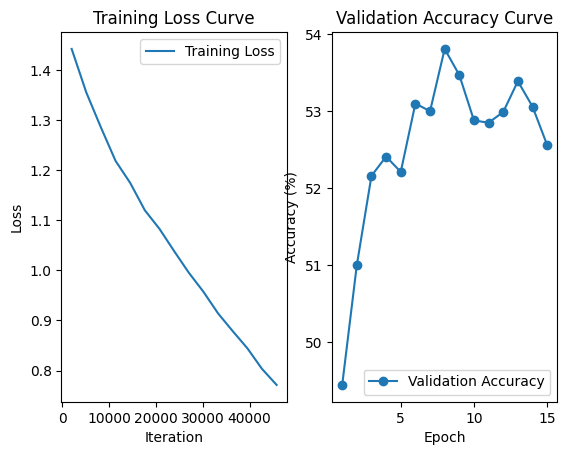

In [49]:
# Lists to store loss and accuracy values.
train_losses = []  #NEW VARS
iter_counts = []  #NEW VARS
val_accs = []     #NEW VARS
iteration_count = 0 #NEW VARIABLE

for epoch in range(15):  # changed from 2 -> 15 epochs

    running_loss = 0.0


    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data
        inputs = inputs.cuda()
        labels = labels.cuda()


        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = mlp(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        iteration_count += 1
        if i % 2000 == 1999:    # Chnaged 2000,1999 -> 200, 199 print every 200 mini-batches
            # Record and reset running loss for plotting
            train_losses.append(running_loss / 2000)#APPEND TO LIST
            iter_counts.append(iteration_count)
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0

    # Evaluate on validation data after each epoch.
    mlp.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for data in testloader:
            images, labels = data
            images = images.cuda()
            labels = labels.cuda()
            outputs = mlp(images)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    acc = 100 * correct / total
    val_accs.append(acc)
    print(f'Validation accuracy after epoch {epoch+1}: {acc:.2f}%')

print('Finished Training')
plt.figure()
plt.subplot(1,2,1)
plt.plot(iter_counts, train_losses, label='Training Loss')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Training Loss Curve')
plt.legend()
plt.subplot(1,2,2)
plt.plot(range(1, len(val_accs)+1), val_accs, marker='o', label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.title('Validation Accuracy Curve')
plt.legend()

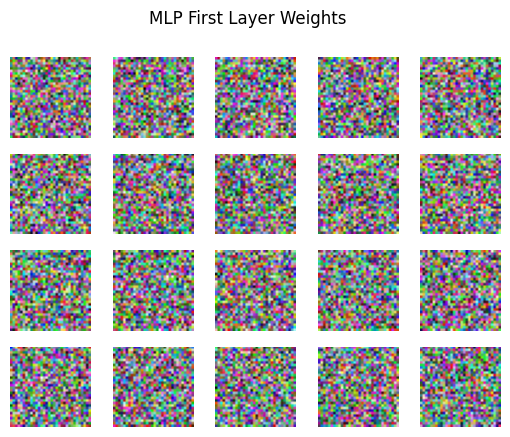

In [18]:
#PART D
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

class MLP(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.hidden = nn.Linear(3*32*32, 400)
        self.output = nn.Linear(400, 10)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.flatten(x)
        x = self.relu(self.hidden(x))
        x = self.output(x)
        return x

mlp = MLP()

import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(mlp.parameters(), lr=0.001, momentum=0.9)

# Get weights from first layer
weights = mlp.hidden.weight.detach().cpu()

# Plot 20 neurons
plt.figure()
for i in range(20):
    plt.subplot(4, 5, i+1)
    img = weights[i].view(3, 32, 32).permute(1, 2, 0)  # Reshape to 32x32x3
    img = (img - img.min()) / (img.max() - img.min())   # Normalize to [0,1]
    plt.imshow(img)
    plt.axis('off')
plt.suptitle('MLP First Layer Weights')
plt.show()

Text(0.5, 1.0, 'CNN First Layer Filters')

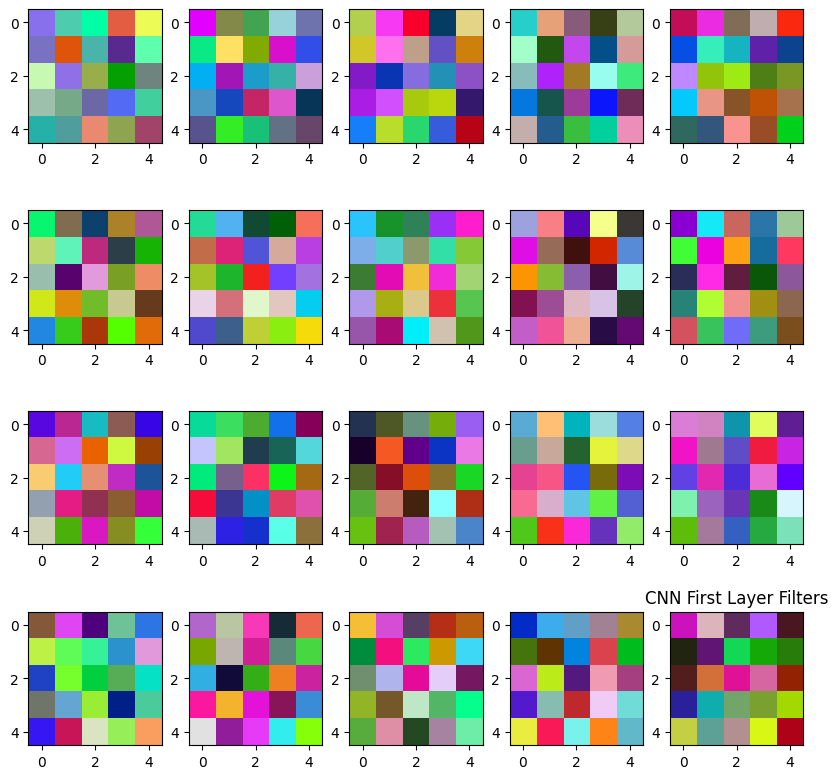

In [30]:
#PART E
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 20, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

net = Net()
# Get filters from first conv layer
filters = net.conv1.weight.detach().cpu()

# Plot all filters
plt.figure(figsize=(10, 10))
for i in range(20):
    plt.subplot(4, 5, i+1)
    filter_img = filters[i].permute(1, 2, 0)  # 5x5x3
    filter_img = (filter_img - filter_img.min()) / (filter_img.max() - filter_img.min())
    plt.imshow(filter_img)
plt.title('CNN First Layer Filters')

#### PART f:
CNNs outperformed MLPs for image-related tasks due to their architecture being explicitly designed to process spatial hierarchies and local patterns in visual data. Furthermore, in practical implementations, CNNs demonstrated greater computational efficiency—they achieved comparable or superior results with reduced processing time compared to MLPs when working with image datasets.